In [56]:
"""import glob
import csv
import os
from os import listdir
from os.path import isfile, join
import codecs
import re
print(os.getcwd())
#os.chdir("kavanaugh_dissent_or_writing")
loc = os.getcwd()
file_name_lst=[]
text_lst=[]
#print(listdir(loc))
file_path = "text.csv"
for file in glob.glob("*.txt"):
    file_name_lst.append(file)
    string = open(file).read()
    new_str = re.sub('[^a-zA-Z0-9\n\.]', ' ', string)
    open(file, 'w').write(new_str)
    f=open(file, 'rb')
    #f = codecs.open(file, "rb")
    #for line in f:
    text_lst.append(f.readlines())
        #text_lst.append(line)
    #csv_writer.writerow(f.readlines())
    f.close()
#print(file_name_lst)
#print(text_lst)
#all the file name and texts are included in the lst
#find out why the texts are wrong in the format
with open(file_path,"w",newline='') as csv_file:
     csv_writer = csv.writer(csv_file)
     csv_writer.writerow(file_name_lst)
     csv_writer.writerow(text_lst)
     f.close()
f=open(path, 'rb')
#print(f.readlines())
f.close()
"""

/Users/wangpeiyu/Desktop


NameError: name 'f' is not defined

In [62]:
"""import codecs
print(os.getcwd())
file="test.txt"
file_path="test.csv"
#f = codecs.open('test.txt', encoding='utf-8')
#print(f.readlines())
string = open(file).read()
new_str = re.sub('[^a-zA-Z0-9\n\.]', ' ', string)
open(file, 'w').write(new_str)
f=open(file, 'rb')
for line in f:
    print(line)
#f=open(path, 'rb')
#print(x.decode(encoding='UTF-8') for x in f.readlines())
#f.close()
with open(file_path,"wb") as csv_file:
     csv_writer = csv.writer(csv_file)
     f=open(file, 'rb')
     csv_writer.writerow(f.readlines())
     f.close()"""

'import codecs\nprint(os.getcwd())\nfile="test.txt"\nfile_path="test.csv"\n#f = codecs.open(\'test.txt\', encoding=\'utf-8\')\n#print(f.readlines())\nstring = open(file).read()\nnew_str = re.sub(\'[^a-zA-Z0-9\n\\.]\', \' \', string)\nopen(file, \'w\').write(new_str)\nf=open(file, \'rb\')\nfor line in f:\n    print(line)\n#f=open(path, \'rb\')\n#print(x.decode(encoding=\'UTF-8\') for x in f.readlines())\n#f.close()\nwith open(file_path,"wb") as csv_file:\n     csv_writer = csv.writer(csv_file)\n     f=open(file, \'rb\')\n     csv_writer.writerow(f.readlines())\n     f.close()'

In [2]:
#1.Concatenating
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
data=pd.read_csv("dataset.csv")
print(data)
X=data[['word_count','outcome','weights']]
y=data['case #']
pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])
X_features = combined_features.fit(X, y).transform(X)
svm = SVC(kernel="linear")
pipeline = Pipeline([("features", combined_features), ("svm", svm)])
param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)


    case #  word_count  outcome  weights
0        1    0.370566        0      0.3
1        2    0.829029        1      0.3
2        3    0.392156        1      0.3
3        4    0.582046        1      0.3
4        5    0.999693        1      0.3
5        5    0.036485        1      0.3
6        6    0.477227        1      0.3
7        6    0.000000        1      0.3
8        7    0.750745        0      0.3
9        8    0.322595        1      0.3
10       9    0.609287        1      0.3
11      10    0.991954        1      0.3
12      10    0.059304        1      0.3
13      11    0.651884        1      0.3
14      12    0.570437        0      0.7
15      13    0.976106        0      0.7
16      13    0.967200        0      0.7
17      13    0.994533        0      0.7
18      13    0.093793        0      0.7
19      14    0.118270        0      0.7
20      15    0.987746        0      0.7
21      15    0.976813        0      0.7
22      15    1.000000        0      0.7
23      15    0.

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWar

[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.5, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.15789473684210525, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.5, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10,

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz

[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=1, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=1, score=0.5, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.15789473684210525, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.0, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz

[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=0.1, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=0.1, score=0.5, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=1, score=0.15789473684210525, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=1, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=1, score=0.5, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=10,

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz

[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=10, score=0.15789473684210525, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=10, score=0.16666666666666666, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=10, score=0.0, total=   0.0s
Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=1, score_func=<function f_classif at 0x1a19f0aea0>))],
       transforme...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.9s finished
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


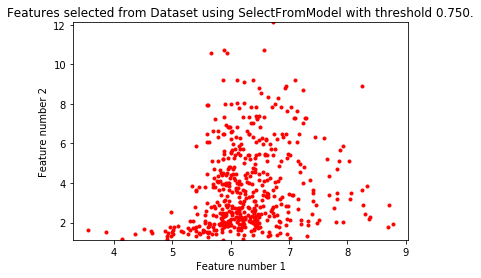

In [4]:
#2.Feature Selection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
data=pd.read_csv("dataset.csv")
#print(data)
X=data[['word_count','outcome','weights']]
y=data['case #']

"""boston = load_boston()
X, y = boston['data'], boston['target']"""

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Dataset using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

explained variance ratio (first two components): [0.66950366 0.30901475]


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


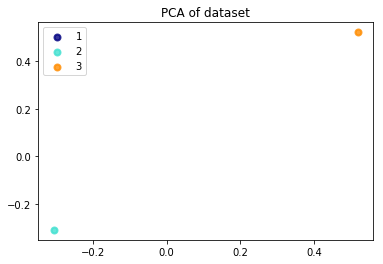

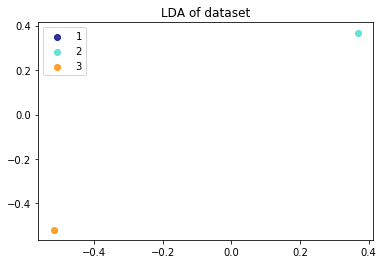

In [5]:
#3.Comparison of LDA and PCA 2D projection of dataset
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data=pd.read_csv("dataset.csv")
#print(data)
X=data[['word_count','outcome','weights']]
y=data['case #']

target_names = data['case #']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 0], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 0], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()

Data from - case #:


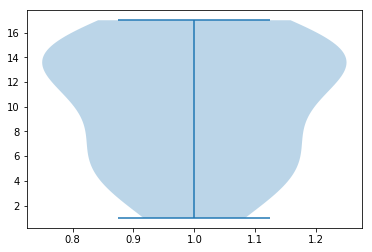

Data from - word_count:


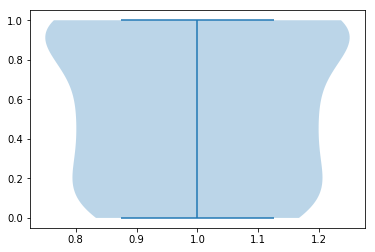

Data from - outcome:


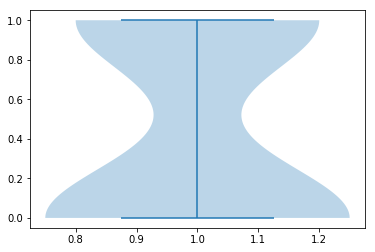

Data from - weights:


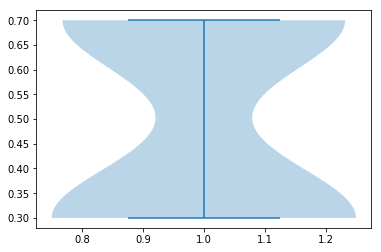

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv")
for header in data.columns:
    print("Data from - {}:".format(header))
    plt.violinplot(data[header])
    plt.show()

Data from - case #:


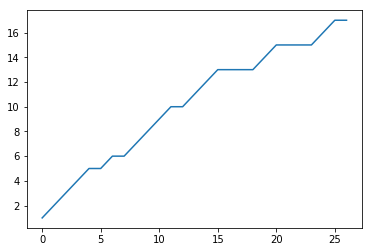

Data from - word_count:


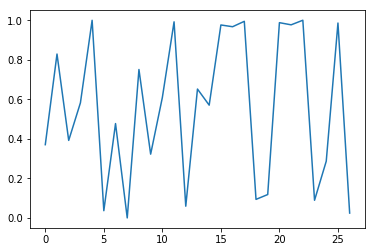

Data from - outcome:


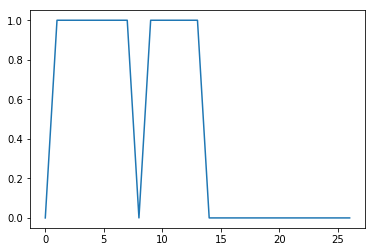

Data from - weights:


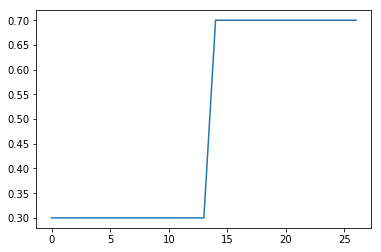

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv")
for header in data.columns:
    print("Data from - {}:".format(header))
    plt.plot(data[header])
    plt.show()

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


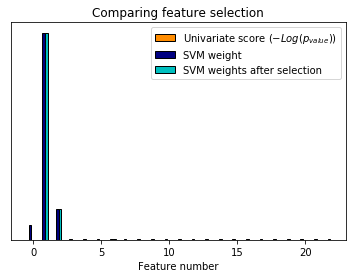

In [8]:
#Univariate Feature Selection
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The dataset
data=pd.read_csv("dataset.csv")
#print(data)


# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(data[['word_count','outcome','weights']]), 20))

# Add the noisy data to the informative features
X = np.hstack((data[['word_count','outcome','weights']], E))
y=data['case #']

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

['case #' 'word_count' 'outcome' 'weights']


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


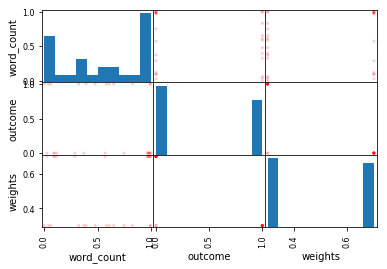

,word_count,outcome,weights
word_count,1.000000,-0.156444,0.155680
outcome,-0.156444,1.000000,-0.861892
weights,0.155680,-0.861892,1.000000


In [13]:
import matplotlib.pyplot as plt
print(data.columns.values)
data.head()
axes = pd.tools.plotting.scatter_matrix(data[['word_count','outcome','weights']],c='r', alpha=0.2)
plt.show()
data[['word_count','outcome','weights']].corr()

[-0.13841098] -0.09205603715358977


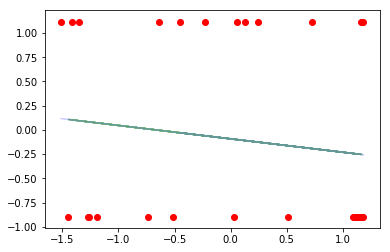

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_HD=data[['word_count','outcome']].values
X_HDn=(X_HD-X_HD.mean(axis=0))/X_HD.std(axis=0)
radius_std_vec=X_HDn[:,0]
radius_std=radius_std_vec.reshape(-1,1)
texture_std_vec=X_HDn[:,1]
texture_std=texture_std_vec.reshape(-1,1)
X_train, X_test, Y_train, Y_test=train_test_split(radius_std,texture_std_vec)
clf1=LinearRegression()
clf1.fit(X_train,Y_train)
predicted_train=clf1.predict(X_train)
predicted_test=clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
print(clf1.coef_,clf1.intercept_)
plt.scatter(radius_std,texture_std_vec,c='r')
plt.plot(X_train,predicted_train,c='g',alpha=0.5)
plt.plot(X_test,predicted_test,c='b',alpha=0.2)

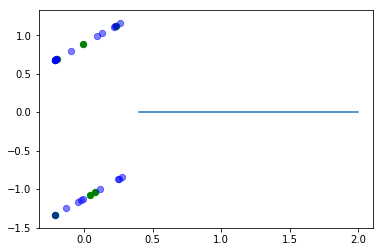

In [15]:
plt.scatter(predicted_test, predicted_test-Y_test,c='g',s=40)
plt.scatter(predicted_train,predicted_train-Y_train,c='b',s=40,alpha=0.5)
plt.plot([0.4,2],[0,0])

[0.578222 0.421778]


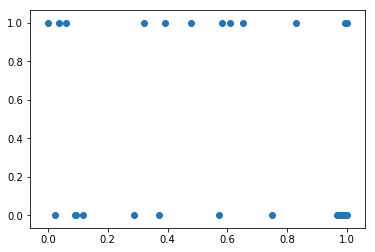

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(X_HDn)
print(pca.explained_variance_ratio_)
plt.scatter(X_HD[:,0],X_HD[:,1])

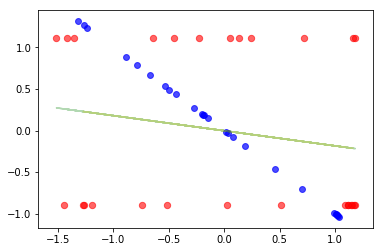

In [17]:
pca1=PCA(n_components=1) #only keep one dimension
X_E=pca1.fit_transform(X_HDn)
X_reconstructed=pca1.inverse_transform(X_E)
plt.scatter(X_reconstructed[:,0],X_reconstructed[:,1],c='b',s=35,alpha=0.7)
plt.scatter(radius_std,texture_std_vec,s=40,c='r',alpha=0.6)
plt.plot(X_train,predicted_train,c='g',alpha=0.3)
plt.plot(X_test,predicted_test,c='y',alpha=0.3)

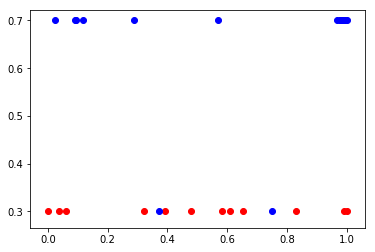

In [11]:
plt.scatter(data[['word_count']].query("@data.outcome==1"),data[['weights']].query("@data.outcome==1"),c='r')
plt.scatter(data[['word_count']].query("@data.outcome==0"),data[['weights']].query("@data.outcome==0"),c='b')


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


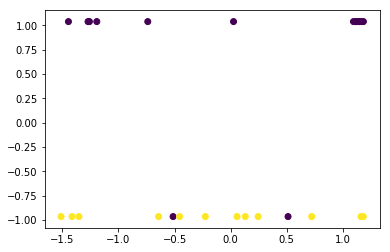

In [54]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
smaller_df=data[['word_count','weights']]
scaler = StandardScaler()  
scaler.fit(smaller_df)
smaller_df = scaler.transform(smaller_df)  

classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(smaller_df, data[['outcome']])  
plt.scatter(classifier._fit_X[:,0],classifier._fit_X[:,1],c=classifier._y)

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


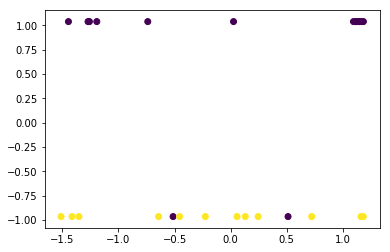

In [55]:
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(smaller_df, data[['outcome']])  
plt.scatter(classifier._fit_X[:,0],classifier._fit_X[:,1],c=classifier._y)

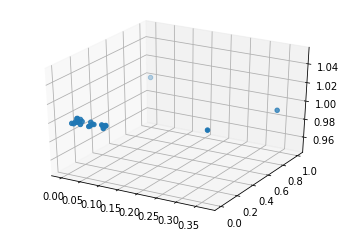

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
    
fig= plt.figure()
axes=fig.add_subplot(111, projection='3d')
axes.scatter(X[0], X[1], y[0])
plt.show()